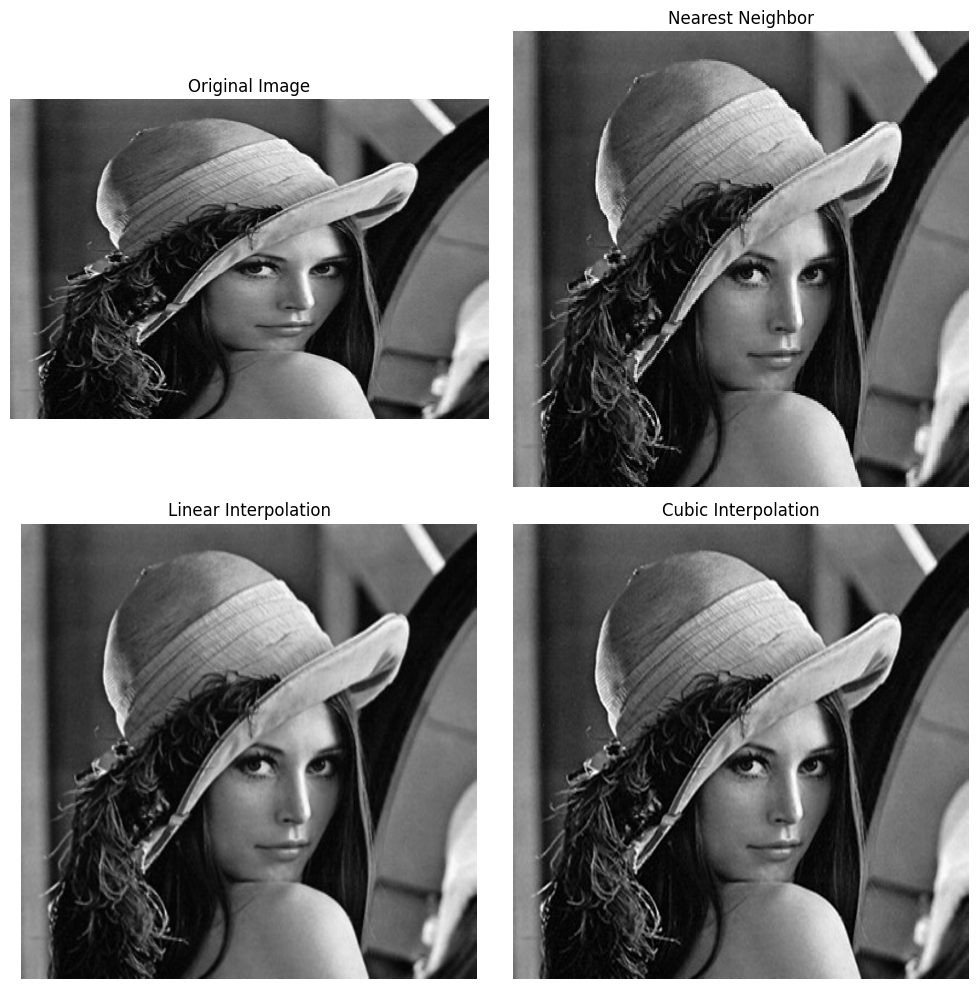

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Picture1.jpg')

width = 500
height = 500

nearest_resized = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
linear_resized = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)
cubic_resized = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(nearest_resized, cv2.COLOR_BGR2RGB))
plt.title('Nearest Neighbor')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(linear_resized, cv2.COLOR_BGR2RGB))
plt.title('Linear Interpolation')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(cubic_resized, cv2.COLOR_BGR2RGB))
plt.title('Cubic Interpolation')
plt.axis('off')

plt.tight_layout()
plt.show()


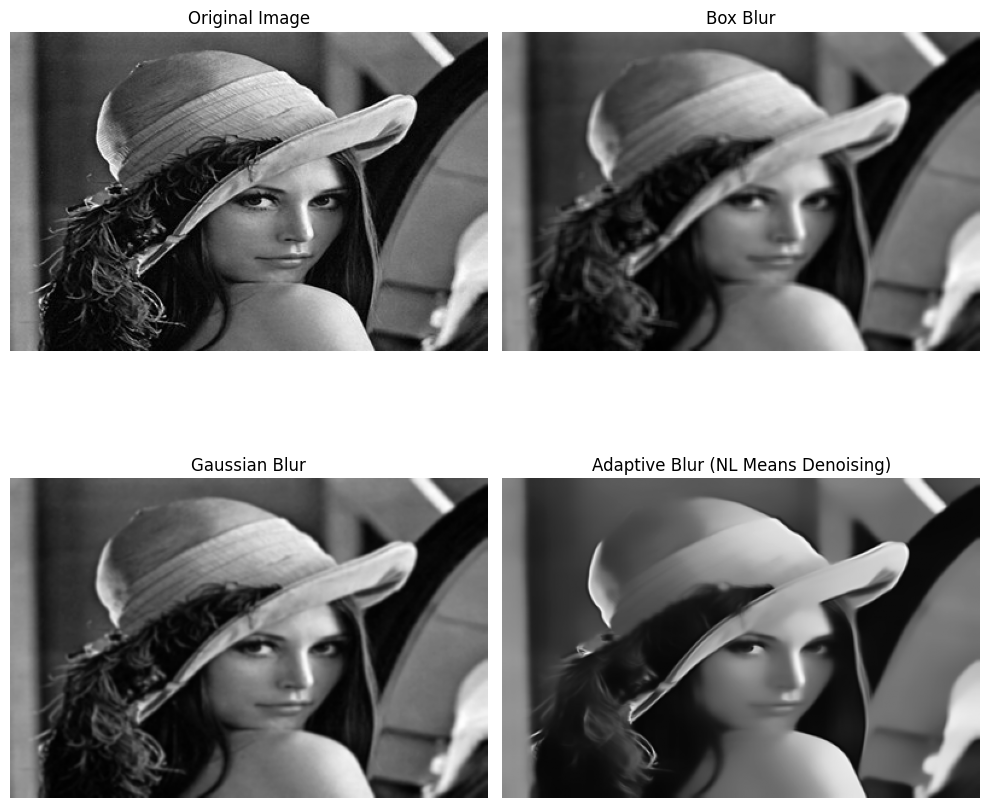

In [ ]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

box_blurred = cv2.blur(gray_image, (5, 5))  # Kernel size 5x5

gaussian_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Kernel size 5x5, sigma = 0

adaptive_blurred = cv2.fastNlMeansDenoising(gray_image, None, 30, 7, 21)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(box_blurred, cmap='gray')
plt.title('Box Blur')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_blurred, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(adaptive_blurred, cmap='gray')
plt.title('Adaptive Blur (NL Means Denoising)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Function to load MNIST images
def load_images(file_path):
    with open(file_path, 'rb') as f:
        # Read metadata
        magic_number, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        # Read image data
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
    return images

# Function to load MNIST labels
def load_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read metadata
        magic_number, num_labels = struct.unpack(">II", f.read(8))
        # Read label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


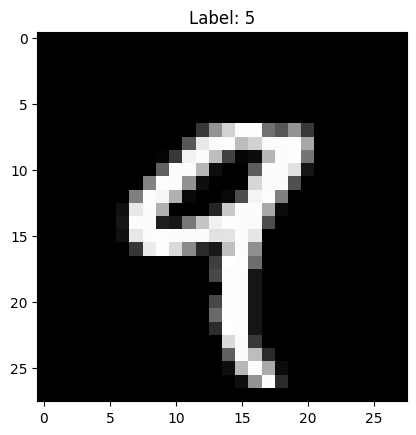

In [ ]:
# Load the data
train_images = load_images('train-images.idx3-ubyte')
train_labels = load_labels('train-labels.idx1-ubyte')
test_images = load_images('t10k-images.idx3-ubyte')
test_labels = load_labels('t10k-labels.idx1-ubyte')

train_images = train_images / 255.0
test_images = test_images / 255.0

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

plt.imshow(train_images[4].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


Training SVM...


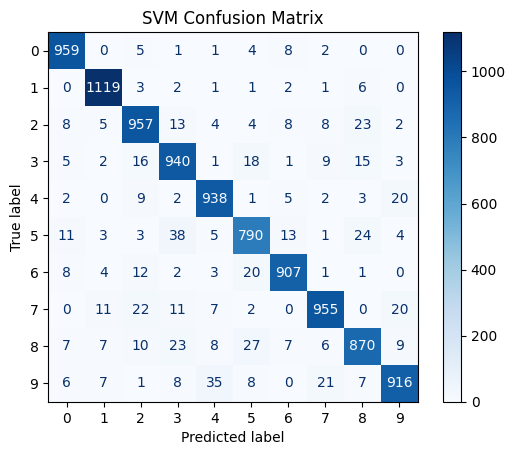

Training Random Forest...


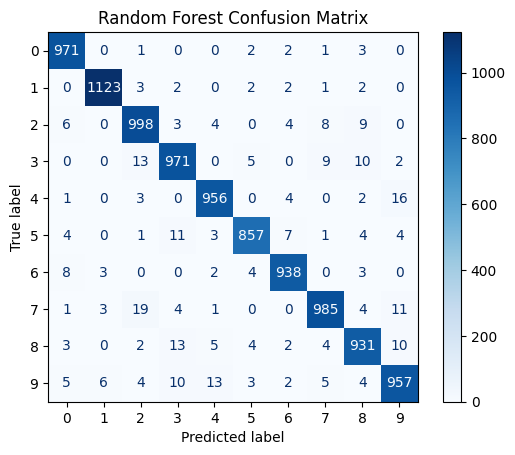

In [ ]:
models = {
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(test_images)

    accuracy = accuracy_score(test_labels, y_pred)
    cm = confusion_matrix(test_labels, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    }

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


In [ ]:
for model_name, metrics in results.items():
    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")



Results for SVM:
Accuracy: 0.9351
Confusion Matrix:
[[ 959    0    5    1    1    4    8    2    0    0]
 [   0 1119    3    2    1    1    2    1    6    0]
 [   8    5  957   13    4    4    8    8   23    2]
 [   5    2   16  940    1   18    1    9   15    3]
 [   2    0    9    2  938    1    5    2    3   20]
 [  11    3    3   38    5  790   13    1   24    4]
 [   8    4   12    2    3   20  907    1    1    0]
 [   0   11   22   11    7    2    0  955    0   20]
 [   7    7   10   23    8   27    7    6  870    9]
 [   6    7    1    8   35    8    0   21    7  916]]

Results for Random Forest:
Accuracy: 0.9687
Confusion Matrix:
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1123    3    2    0    2    2    1    2    0]
 [   6    0  998    3    4    0    4    8    9    0]
 [   0    0   13  971    0    5    0    9   10    2]
 [   1    0    3    0  956    0    4    0    2   16]
 [   4    0    1   11    3  857    7    1    4    4]
 [   8    3    0    0    2    4  93